In [1]:
import pandas as pd    #读取数据
filename='advertising.csv'
data=pd.read_csv(filename,index_col=0)
print(data.iloc[0:5,:].values)


[[230.1  37.8  69.2  22.1]
 [ 44.5  39.3  45.1  10.4]
 [ 17.2  45.9  69.3   9.3]
 [151.5  41.3  58.5  18.5]
 [180.8  10.8  58.4  12.9]]


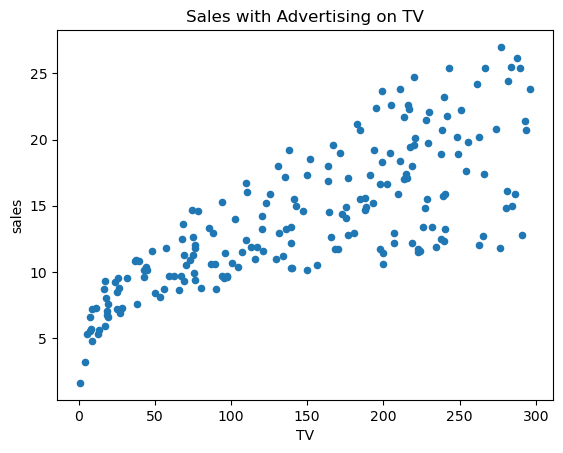

In [4]:
#可视化分析
#导入绘图库
import matplotlib.pyplot as plt
data.plot(kind='scatter',x='TV',y='Sales',title='Sales with Advertising on TV',xlabel='TV',ylabel='sales')
plt.show()


In [9]:
#建立3个自变量和目标变量之间的线性回归模型
x= data.iloc[: ,0:3].values.astype (float)
y= data.iloc[: ,3].values.astype (float)
from sklearn.linear_model import LinearRegression 
linreg=LinearRegression ()
linreg.fit(x,y)
print(linreg.intercept_,linreg.coef_)   #截距和回归系数



2.9388893694594067 [ 0.04576465  0.18853002 -0.00103749]


In [12]:
import joblib#这个包的作用就是保存和加载模型
joblib.dump(linreg, 'linreg.pkl') #保存至文件 dump
#重新加载预测数据
import numpy as np
load_linreg = joblib.load('linreg.pkl') #从文件读取  load模型
new_X = np.array([[130.1,87.8,69.2]])
print("6月广告投入：",new_X)
print("预期销售：",load_linreg.predict(new_X) ) #使用   xxx.predict()模型预测

6月广告投入： [[130.1  87.8  69.2]]
预期销售： [25.37401071]


In [18]:
#模型评估
#1.切分为训练集和测试集
from sklearn import model_selection 
X_train,X_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.35,random_state=1)
#在训练集上学习
linregTr = LinearRegression() 
linregTr.fit(X_train, y_train)
print (linregTr.intercept_, linregTr.coef_)
#在测试集上评估
from sklearn import metrics
y_train_pred = linregTr.predict(X_train)
y_test_pred = linregTr.predict(X_test)
train_err = metrics.mean_squared_error(y_train, y_train_pred)    #训练集误差
test_err = metrics.mean_squared_error(y_test, y_test_pred)   #测试集误差
print( 'The mean squar error of train and test are: {:.2f}, {:.2f}'.format(train_err, test_err) )
predict_score =linregTr.score(X_test,y_test)#决定系数
print('The decision coeficient is: {:.2f} '.format(predict_score) )

2.9324713466040873 [0.04608839 0.18047646 0.00411699]
The mean squar error of train and test are: 3.06, 2.32
The decision coeficient is: 0.91 


In [19]:
#读取数据
boston_housing = pd.read_csv('boston_housing_data.csv') # 导入数据集
display(boston_housing.head())
boston_housing = boston_housing.sample(frac=1) # 对数据进行打乱
display(boston_housing.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
32,1.38799,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,4,307.0,21.0,232.60,27.71,13.2
111,0.10084,0.0,10.01,0.0,0.547,6.715,81.6,2.6775,6,432.0,17.8,395.59,10.16,22.8
300,0.04417,70.0,2.24,0.0,0.400,6.871,47.4,7.8278,5,358.0,14.8,390.86,6.07,24.8
233,0.33147,0.0,6.20,0.0,0.507,8.247,70.4,3.6519,8,307.0,17.4,378.95,3.95,48.3
22,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4,307.0,21.0,396.90,18.72,15.2


In [20]:
#空值数据预处理
display(boston_housing.shape)
display(boston_housing.isnull().any())   #检查每一列是否有缺失值
boston_housing.dropna(inplace=True)
display(boston_housing.shape)

(506, 14)

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PIRATIO    False
B          False
LSTAT      False
MEDV        True
dtype: bool

(452, 14)

In [9]:
#绘图观察数据
import pandas as pd
import matplotlib.pyplot as plt
 #（散点图矩阵这种不行）boston_housing.plot(kind='scatter_matrix',diagonal='kde',color='k')
pd.plotting.scatter_matrix(boston_housing,diagonal='kde',color='k')
plt.show()

NameError: name 'boston_housing' is not defined

In [5]:
train_num=int(boston_housing.shape[0]*0.8)  #shape[0]表示总数
X_train = boston_housing.iloc[:train_num,:-1].values.astype(float) 
# 训练集为前80%的数据
y_train = boston_housing.iloc[:train_num,-1].values.astype(float) 
# train_x为特征列，train_y为真实值列
X_test = boston_housing.iloc[train_num:,:-1].values.astype(float) 
# 测试集为剩余数据
y_test = boston_housing.iloc[train_num:,-1].values.astype(float)

fromsklearn.linear_modelimportLinearRegression linreg=LinearRegression()
linreg.fit(X_train,y_train)
#输出线性回归模型的截距和回归系数 
display(linreg.intercept_,linreg.coef_)

SyntaxError: invalid syntax (3467983657.py, line 12)

In [ ]:
#预测结果图形比较 
%matplotlibinline 
importmatplotlib.pyplotasplt 
fig=plt.figure(figsize=(8,5))#画一个窗口为8,5大小的
plt.plot(y_test,label='真实值')   #画测试集的真实值
plt.plot(y_test_pred,label='预测值')   #画测试机的预测值
plt.legend()  #画标签
plt.show()